## Visualizing Feature Maps

Visualizing feature maps for a specific input image would help us understand what features of the input are detected in a feature map. Earlier layers help us detect small or fine-grained detail, whereas feature maps close to the output capture more general features.

In [81]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from copy import deepcopy
import json
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
!wget -O dog.jpg https://cdn.pixabay.com/photo/2016/12/13/05/15/puppy-1903313__340.jpg

--2020-01-08 21:53:17--  https://cdn.pixabay.com/photo/2016/12/13/05/15/puppy-1903313__340.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.82.97, 104.18.141.87
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.82.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27076 (26K) [image/jpeg]
Saving to: ‘dog.jpg’

dog.jpg             100%[===================>]  26.44K  --.-KB/s    in 0.01s   

2020-01-08 21:53:17 (1.81 MB/s) - ‘dog.jpg’ saved [27076/27076]



In [4]:
model = VGG16(weights="imagenet")

In [5]:
for layer in model.layers:
    print(layer._name)

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool
flatten
fc1
fc2
predictions


In [6]:
dictionary = {layer.name:layer for i,layer in enumerate(model.layers)}

In [8]:
dictionary

{'input_1': <tensorflow.python.keras.engine.input_layer.InputLayer at 0x13295e630>,
 'block1_conv1': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x132a7fef0>,
 'block1_conv2': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x132b536a0>,
 'block1_pool': <tensorflow.python.keras.layers.pooling.MaxPooling2D at 0x1103ebbe0>,
 'block2_conv1': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x1103ebc50>,
 'block2_conv2': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x11045e400>,
 'block2_pool': <tensorflow.python.keras.layers.pooling.MaxPooling2D at 0x1104666a0>,
 'block3_conv1': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x110466ac8>,
 'block3_conv2': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x11049feb8>,
 'block3_conv3': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x1104b6f98>,
 'block3_pool': <tensorflow.python.keras.layers.pooling.MaxPooling2D at 0x1104d5438>,
 'block4_conv1': <tensorflow.python.keras.layers.

In [57]:
img = load_img("dog.jpg")

In [58]:
img = img_to_array(img)

In [59]:
img.shape

(340, 510, 3)

In [60]:
img = tf.image.resize(img, (224, 224))

In [61]:
img.shape

TensorShape([224, 224, 3])

In [62]:
img = np.expand_dims(img, axis=0)

In [63]:
img.shape

(1, 224, 224, 3)

In [64]:
!wget https://raw.githubusercontent.com/akshaychawla/Occlusion-experiments-for-image-segmentation/master/imagenet_class_index.json

--2020-01-08 23:34:11--  https://raw.githubusercontent.com/akshaychawla/Occlusion-experiments-for-image-segmentation/master/imagenet_class_index.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35363 (35K) [text/plain]
Saving to: ‘imagenet_class_index.json.2’

imagenet_class_inde 100%[===================>]  34.53K  --.-KB/s    in 0.02s   

2020-01-08 23:34:12 (1.64 MB/s) - ‘imagenet_class_index.json.2’ saved [35363/35363]



### Prediction Stuff

In [65]:
pred_idx = np.argmax(model.predict(img))
pred_idx

208

In [66]:
with open("imagenet_class_index.json", "rt") as f:
    imagenet_labels = json.load(f)
pred_label = imagenet_labels[str(pred_idx)][1]

(-0.5, 509.5, 339.5, -0.5)

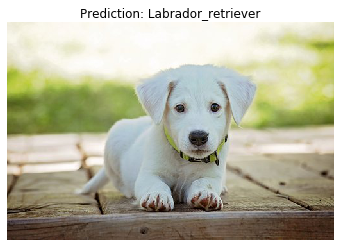

In [67]:
orig_img = load_img("dog.jpg")
plt.imshow(orig_img)
plt.title(f"Prediction: {pred_label}")
plt.axis("off")

### Visualization Stuff

#### Intial Layer Feature Map Visualization

Visualization of feature map in the initial layers makes more sense.

In [85]:
layer = "block1_conv2"

In [86]:
feat_model = tf.keras.Model(inputs=model.input, outputs=dictionary[layer].output)

In [87]:
feature_map = feat_model.predict(img)

In [88]:
feature_map.shape

(1, 224, 224, 64)

In [89]:
dictionary[layer].output.shape

TensorShape([None, 224, 224, 64])

In [90]:
feature_map[0].shape

(224, 224, 64)

There are 64 filters in the 2nd convolution layer of the first block

In [91]:
feature_map[0][:,:,0].shape

(224, 224)

In [92]:
feature_map[0][:,:,7]

array([[130.28908 , 246.10373 , 195.48819 , ..., 234.7805  , 298.99854 ,
        180.05779 ],
       [114.30581 , 242.47514 , 133.3598  , ..., 207.30443 , 328.14716 ,
        168.0098  ],
       [ 56.55964 , 165.58852 ,  17.80154 , ..., 111.648735, 297.85004 ,
        145.99141 ],
       ...,
       [ 36.35368 ,  73.667114,  52.75085 , ...,  66.64664 ,  97.96527 ,
         52.258335],
       [ 38.246372,  73.33852 ,  59.549644, ...,  75.51813 ,  95.878876,
         50.439648],
       [ 21.432419,  37.071877,  29.672441, ...,  42.877476,  54.531372,
         27.627743]], dtype=float32)

Visualizing the output of the first 5 feature map on the image

In [94]:
n_filters = feature_map.shape[-1]

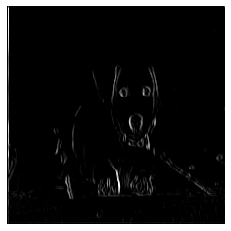

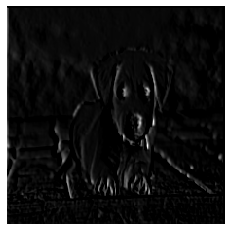

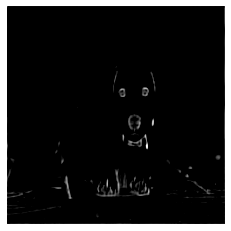

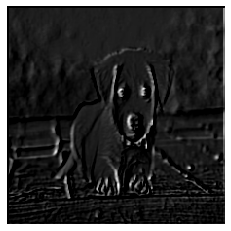

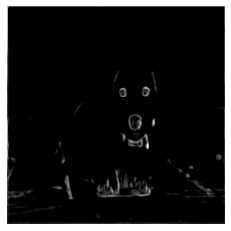

In [96]:
for i in random.sample(range(n_filters), 5):
    plt.imshow(feature_map[0][:, :, i], cmap="gray")
    plt.axis("off")
    plt.show()

#### Feature Map Visualization for the last block

In [97]:
layer = "block5_conv3"

In [98]:
feat_model = tf.keras.Model(inputs=model.input, outputs=dictionary[layer].output)

feature_map = feat_model.predict(img)

There are 512 filters in the 3rd layer of the 5th convolution block

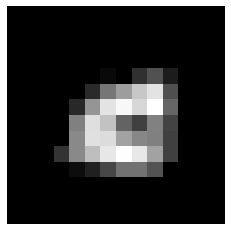

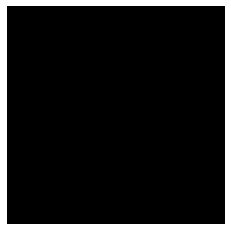

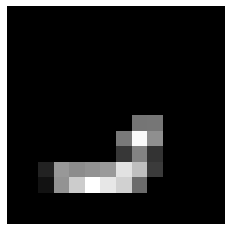

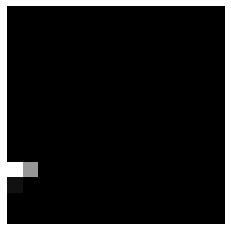

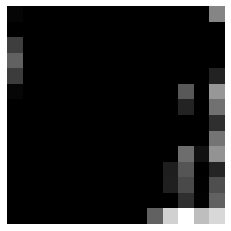

In [100]:
n_filters = feature_map.shape[-1]

for i in random.sample(range(n_filters), 5):
    plt.imshow(feature_map[0][:, :, i], cmap="gray")
    plt.axis("off")
    plt.show()